In [1]:
import pandas as pd

In [2]:
# 한글 저장코드로 encoding 해줘야 깨지지 않고 불러와진다!
# encoding='cp949'
first_df = pd.read_csv('전국_평균_분양가격(2013년_9월부터_2015년_8월까지).csv',encoding='cp949')

In [3]:
first_df.head(2)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [4]:
first_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [5]:
last_df = pd.read_csv('주택도시보증공사_전국_평균_분양가격(2019년_12월).csv',encoding='cp949')

In [6]:
last_df.head(2)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652


In [7]:
last_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [8]:
# 조정, 필요없는 값 제거

In [9]:
last_df.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [10]:
# errors='coerce' 입력해서
# 문자형 데이터를 숫자형(정수형)으로 바꿀 때 df에서 바꾸는 방법도 있다는 예제.
# 문제가 있으면 NaN값으로 처리해줌.
last_df['분양가격'] = pd.to_numeric(last_df['분양가격(㎡)'],errors='coerce')

In [11]:
from numpy import nan

In [12]:
type(nan)

float

In [13]:
last_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 203.3+ KB


In [14]:
# 평당 분양 가격으로 조정해준다.

In [15]:
last_df['평당분양가격']=last_df['분양가격']*3.3

In [16]:
last_df['평당분양가격'].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

## 존재하는 데이터를 상황에 따라서 보기 편하게 바꾸는 방법

In [17]:
# 규모구분 컬럼에서 전용면적이라는 글자를 없애고 면적 값만 추출하기 시작
last_df.규모구분.unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [18]:
last_df['전용면적'] = last_df.규모구분.str.replace('전용면적','')

In [19]:
last_df['전용면적'] = last_df['전용면적'].str.replace('초과','~')

In [20]:
last_df['전용면적'] = last_df['전용면적'].str.replace('이하','~')

In [21]:
last_df['전용면적'] = last_df['전용면적'].str.replace(' ','').str.strip()

In [22]:
last_df['전용면적'].unique()

array(['전체', '60㎡~', '60㎡~85㎡~', '85㎡~102㎡~', '102㎡~'], dtype=object)

In [23]:
last_df.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격', '전용면적'], dtype='object')

In [24]:
last_df.drop(columns=['규모구분','분양가격(㎡)'],inplace=True)

In [25]:
last_df.columns

Index(['지역명', '연도', '월', '분양가격', '평당분양가격', '전용면적'], dtype='object')

<AxesSubplot:ylabel='지역명'>

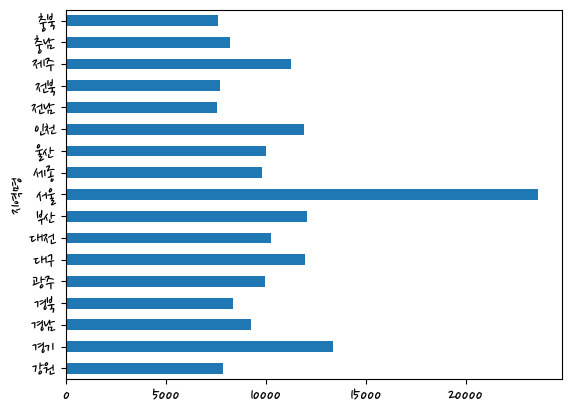

In [26]:
# groupby를 활용하여 그래프 만들기??
# 시리즈니까 바로 플롯이라는게 가능함.
last_df.groupby(['지역명'])['평당분양가격'].mean().plot(kind='barh')

In [27]:
data = last_df.groupby(['전용면적','지역명'])['평당분양가격'].mean().round().reset_index()

In [28]:
data.round(-1)

,전용면적,지역명,평당분양가격
0,102㎡~,강원,8310.0
1,102㎡~,경기,14770.0
2,102㎡~,경남,10360.0
3,102㎡~,경북,9160.0
4,102㎡~,광주,11040.0
...,...,...,...
80,전체,전남,7280.0
81,전체,전북,7290.0
82,전체,제주,10780.0
83,전체,충남,7820.0


In [29]:
# pivot_table 을 활용하여 원하는 표 만들기  
pd.pivot_table(last_df,index=['전용면적','지역명'],values=['평당분양가격']).reset_index().round()

,전용면적,지역명,평당분양가격
0,102㎡~,강원,8311.0
1,102㎡~,경기,14772.0
2,102㎡~,경남,10358.0
3,102㎡~,경북,9157.0
4,102㎡~,광주,11042.0
...,...,...,...
80,전체,전남,7284.0
81,전체,전북,7293.0
82,전체,제주,10785.0
83,전체,충남,7815.0


In [30]:
# 막대 그래프 만들기
data = last_df.groupby(['지역명'])['평당분양가격'].mean()

<AxesSubplot:ylabel='지역명'>

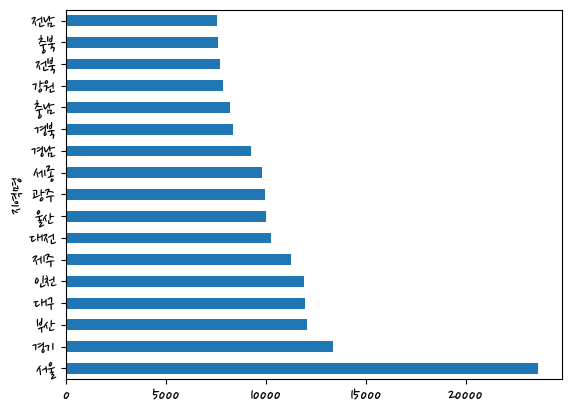

In [31]:
data.sort_values(ascending=False).plot(kind='barh')

<AxesSubplot:xlabel='지역명'>

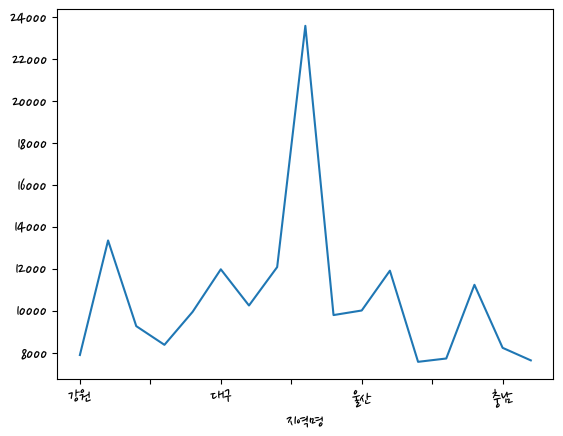

In [32]:
data.plot()

In [33]:
# 전용 면적별 분양가격 추출

<AxesSubplot:xlabel='전용면적'>

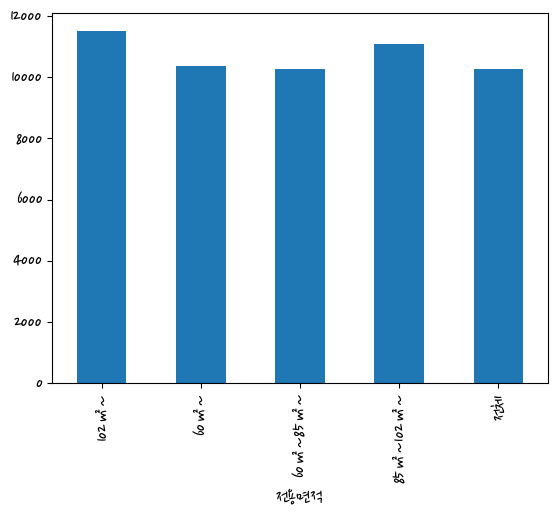

In [34]:
# sort_index() 말고 sort_value 넣어서 수정해보셈 ??
last_df.groupby(['전용면적'])['평당분양가격'].mean().sort_index().plot(kind='bar')

In [35]:
# 연도별 분양가격 추출

In [36]:
last_df.columns

Index(['지역명', '연도', '월', '분양가격', '평당분양가격', '전용면적'], dtype='object')

<AxesSubplot:xlabel='연도'>

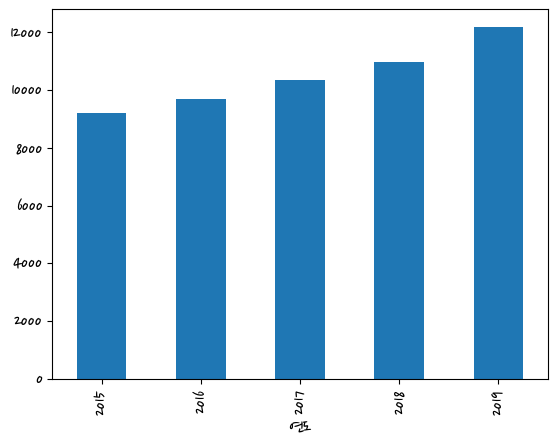

In [37]:
last_df.groupby(['연도'])['평당분양가격'].mean().plot(kind='bar')

In [38]:
data = last_df.groupby(['연도'])['평당분양가격'].mean()

In [39]:
data = last_df.pivot_table(index='월',columns='연도',values='평당분양가격')
data

연도,2015,2016,2017,2018,2019
월,,,,,
1,NaN,9334.029630,10095.132143,10719.148000,11535.540789
2,NaN,9361.440000,10110.885714,10766.668000,11574.793421
3,NaN,9423.276923,10107.428571,10905.488000,11610.094737
4,NaN,9601.993902,10217.232143,10920.728571,11777.876000
5,NaN,9602.396341,10358.819277,11087.485714,11976.394737
6,NaN,9676.042683,10431.618072,10921.928571,12401.884000
7,NaN,9700.551220,10549.536585,10868.376316,12424.852000
8,NaN,9719.023171,10564.869512,10811.147368,12523.896000
9,NaN,9737.656098,10583.601266,10915.257692,12527.571429


<AxesSubplot:>

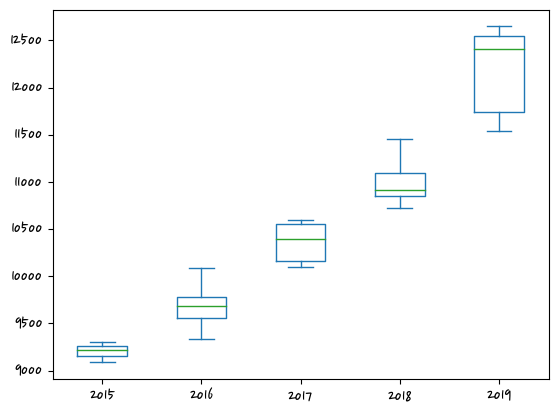

In [40]:
data.plot(kind='box')

In [41]:
data = last_df.groupby(['연도'])['평당분양가격'].mean()
data

연도
2015     9202.735802
2016     9683.025000
2017    10360.487653
2018    10978.938411
2019    12188.293092
Name: 평당분양가격, dtype: float64

In [42]:
data = last_df.pivot_table(index='월',columns='연도',values='평당분양가격')
data

연도,2015,2016,2017,2018,2019
월,,,,,
1,NaN,9334.029630,10095.132143,10719.148000,11535.540789
2,NaN,9361.440000,10110.885714,10766.668000,11574.793421
3,NaN,9423.276923,10107.428571,10905.488000,11610.094737
4,NaN,9601.993902,10217.232143,10920.728571,11777.876000
5,NaN,9602.396341,10358.819277,11087.485714,11976.394737
6,NaN,9676.042683,10431.618072,10921.928571,12401.884000
7,NaN,9700.551220,10549.536585,10868.376316,12424.852000
8,NaN,9719.023171,10564.869512,10811.147368,12523.896000
9,NaN,9737.656098,10583.601266,10915.257692,12527.571429


<AxesSubplot:>

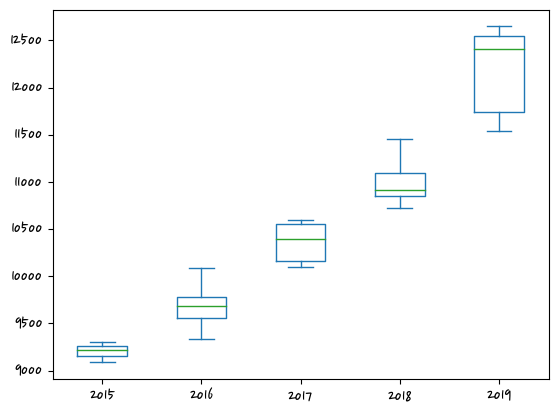

In [43]:
data.plot(kind='box')

In [44]:
import seaborn as sns

- 이 사이트 참고해서 형식 맞춰주고 사용 안되는거 참고해서 사용해야함.
- [seaborn API 사이트](https://seaborn.pydata.org/api.html)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

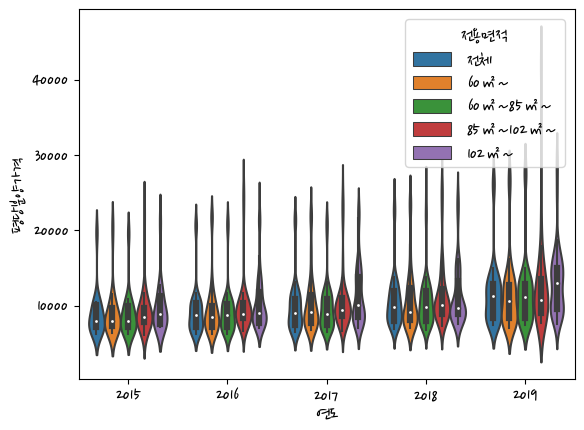

In [45]:
# 바이올린은 바이올린 형태
sns.violinplot(data=last_df,x='연도',y='평당분양가격',hue='전용면적')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

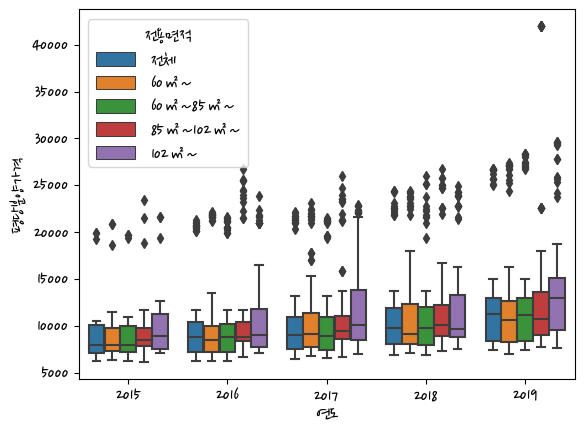

In [46]:
# 박스는 사각형
sns.boxplot(data=last_df,x='연도',y='평당분양가격',hue='전용면적')

In [47]:
first_df

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,...,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,...,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,...,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,...,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,...,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [48]:
first_df_melt = first_df.melt(id_vars='지역',var_name='기간',value_name='평당분양가격')

In [49]:
first_df_melt.head(2)

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111


In [50]:
last_df.columns

Index(['지역명', '연도', '월', '분양가격', '평당분양가격', '전용면적'], dtype='object')

In [51]:
last_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   분양가격    3957 non-null   float64
 4   평당분양가격  3957 non-null   float64
 5   전용면적    4335 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


In [52]:
first_df_melt.columns

Index(['지역', '기간', '평당분양가격'], dtype='object')

In [53]:
first_df_melt['연도'] = first_df_melt['기간'].str.split('년').str.get(0).astype('int')

In [54]:
first_df_melt['월'] = first_df_melt['기간'].str.split('년').str.get(1).str.replace('월','').astype('int')

In [55]:
first_df_melt.columns = ['지역명','기간','평당분양가격','연도','월',]

In [56]:
cols =['지역명','연도','월','평당분양가격']

In [57]:
# 전용면적이 전체인 것만 뽑아오는 방법
data_last = last_df.loc[last_df['전용면적']=='전체',cols]

In [58]:
data_first = first_df_melt[cols]

In [60]:
result = pd.concat([data_first,data_last])
result

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0
...,...,...,...,...
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9
